In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Avesdo_v1.csv', delimiter=',')

In [3]:
len(data)


372

In [30]:
data.groupby('Is this your first Home Purchase?')['How long have you been looking for a new home?'].value_counts(dropna=False)

Is this your first Home Purchase?  How long have you been looking for a new home?
No                                 1-3 months                                        111
                                   Less than 4 weeks                                  66
                                   Over 6 months                                      56
                                   4-6 months                                         32
                                   NaN                                                 6
Yes                                1-3 months                                         32
                                   Over 6 months                                      28
                                   4-6 months                                         18
                                   Less than 4 weeks                                  16
                                   NaN                                                 1
Name: How long have you been

In [29]:
#dados['Is this your first Home Purchase?'].dropna(inplace=True)
#sns.distplot(dados['Is this your first Home Purchase?'],kde=False,bins=50)
data['Is this your first Home Purchase?'].value_counts(dropna=False)

No     271
Yes     95
NaN      6
Name: Is this your first Home Purchase?, dtype: int64

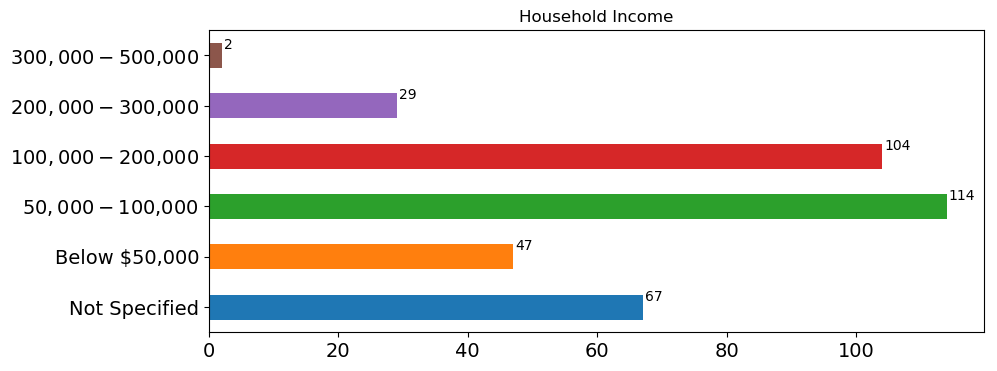

In [119]:
# data['Household Income'].value_counts().sort_index().plot(kind='barh', fontsize=14)
# plt.title('Household Income')
# plt.rcParams['figure.dpi'] = 100;


p = data['Income'] = pd.Categorical(data['Household Income'], ["Not Specified", "Below $50,000", "$50,000 - $100,000", "$100,000 - $200,000", "$200,000 - $300,000",\
"$300,000 - $500,000"])

p = data['Income'].value_counts(sort=False, ascending=False).plot(kind='barh', fontsize=14)
plt.title('Household Income')
plt.rcParams['figure.dpi'] = 100;

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_width pulls left or right; get_y pushes up or down
    p.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=10,color='black')



C:\Users\Luciana\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,1,'What ethnic origin best describes you?')

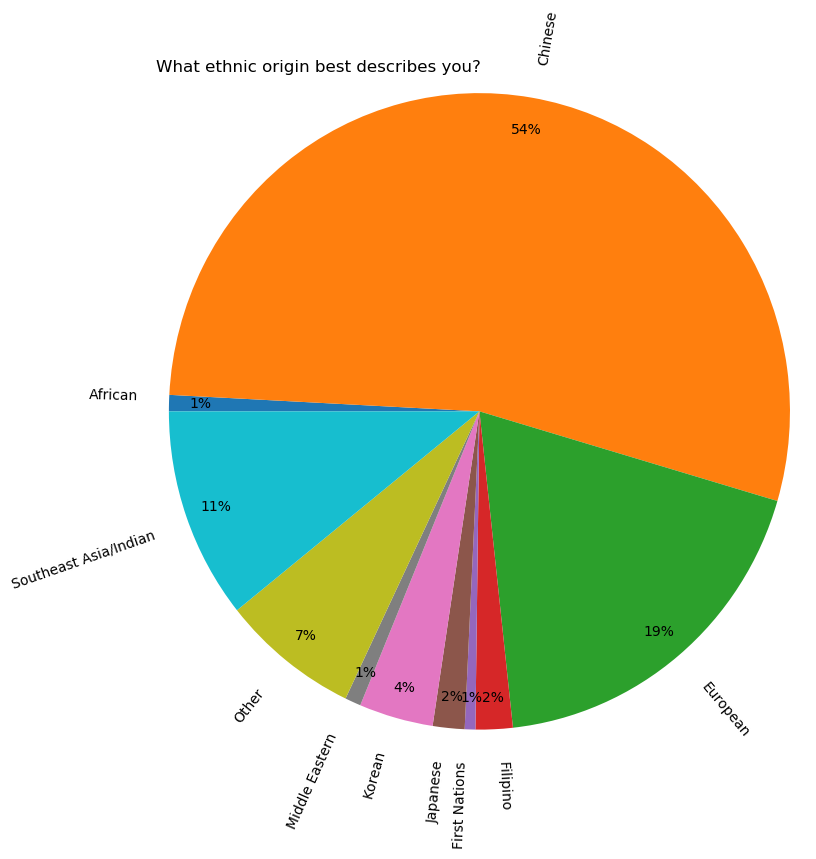

In [7]:
data.groupby('What ethnic origin best describes you?')['What ethnic origin best describes you?'].count().plot(kind='pie', figsize=(7,7),  
                            autopct='%1.0f%%', pctdistance=0.9, radius=1.2, textprops={'fontsize': 10}, rotatelabels = 270, startangle=180,counterclock=False)
plt.rcParams['figure.dpi'] = 100;
plt.tight_layout()
plt.axes().set_ylabel('')
plt.title('What ethnic origin best describes you?',loc='left')
# plt.rcParams['font.size'] = 20.0

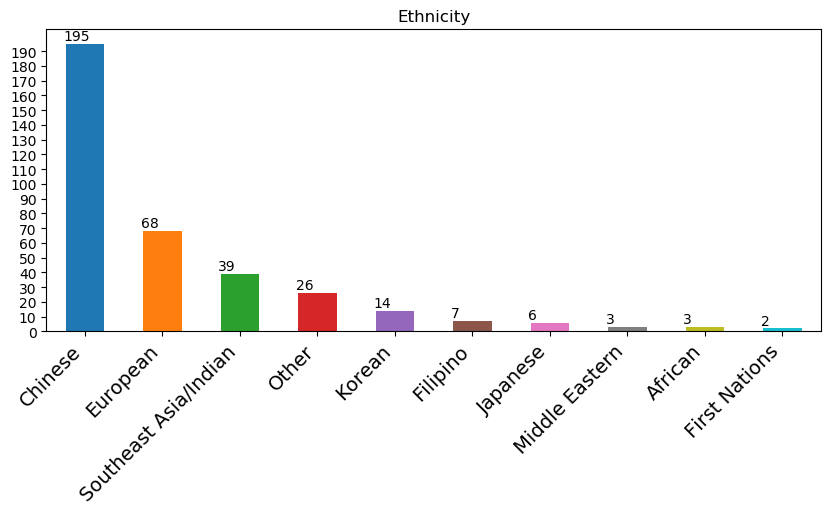

In [104]:
plt.title('Ethnicity');
p = data['What ethnic origin best describes you?'].value_counts().plot.bar();
# plt.figure(figsize=(10,5))
plt.xticks(fontsize=14, rotation=45, ha='right');
plt.yticks(np.arange(0, 200, 10));
# plt.rcParams['font.size'] = 12.0

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=10,verticalalignment='bottom', horizontalalignment='left', color='black')

In [9]:
# chart = sns.countplot(dados['What ethnic origin best describes you?'], order = dados['What ethnic origin best describes you?'].\
#               value_counts().index)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')

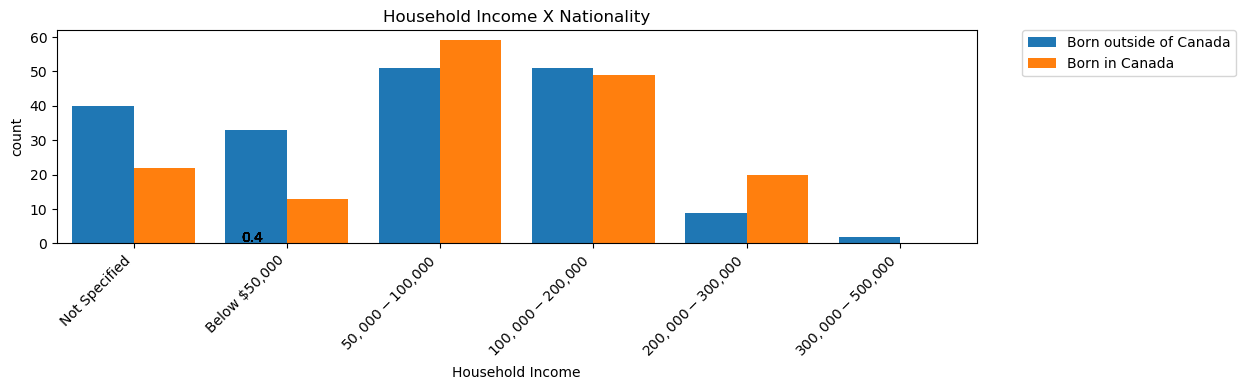

In [120]:
# data['Where were you born?'].value_counts().plot.bar()
p = sns.countplot(data=data, x = 'Household Income', \
                  hue = 'Where were you born?', saturation=1, \
                  order=["Not Specified", "Below $50,000", "$50,000 - $100,000", "$100,000 - $200,000", "$200,000 - $300,000","$300,000 - $500,000"])
#                   order=data.groupby('Household Income')['Household Income'].sum().sort_values(ascending=False).index)
plt.title('Household Income X Nationality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [11]:
data['Age Range'] =''
def ageRange(age):
    if age >= 23 and age <=29 :
        range = '23-29'
    elif age >= 30 and age <= 34 :
        range = '30-34'
    elif age >= 35 and age <= 39 :
        range = '35-39'
    elif age >= 40 and age <= 44 :
        range = '40-44'
    elif age >= 45 and age <= 49 :
        range = '45-49'
    elif age >= 50 and age <= 54 :
        range = '50-54'
    elif age >= 55 and age <= 59 :
        range = '55-59'
    elif age >= 60 and age <= 64 :
        range = '60-64'
    elif age >= 65 :
        range = '65+'
    else :
        range = "Not in range" + age
    return range

for i, row in data.iterrows():
    range = ageRange(row['Age'])
    data.loc[i,'Age Range'] = range

In [12]:
data[['Age','Age Range']].head(20)

,Age,Age Range
0,47,45-49
1,62,60-64
2,58,55-59
3,45,45-49
4,39,35-39
5,43,40-44
6,50,50-54
7,42,40-44
8,53,50-54
9,34,30-34


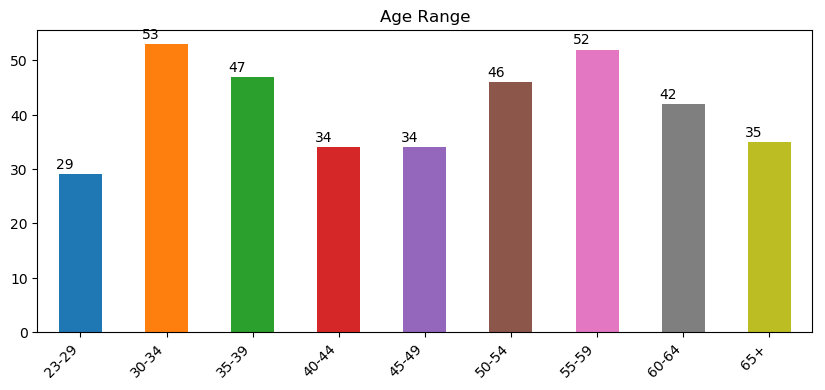

In [103]:
p = data['Age Range'].value_counts().sort_index().plot.bar()
plt.title('Age Range')
plt.xticks(rotation=45, ha='right')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=10,verticalalignment='bottom', horizontalalignment='left', color='black')

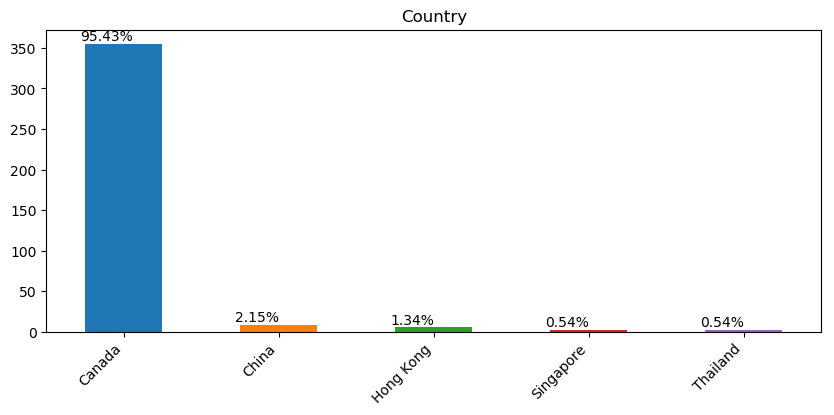

In [98]:
p = data['Country'].value_counts().plot.bar()
plt.title('Country')
plt.xticks(rotation=45, ha='right')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,verticalalignment='bottom', horizontalalignment='left', color='black')

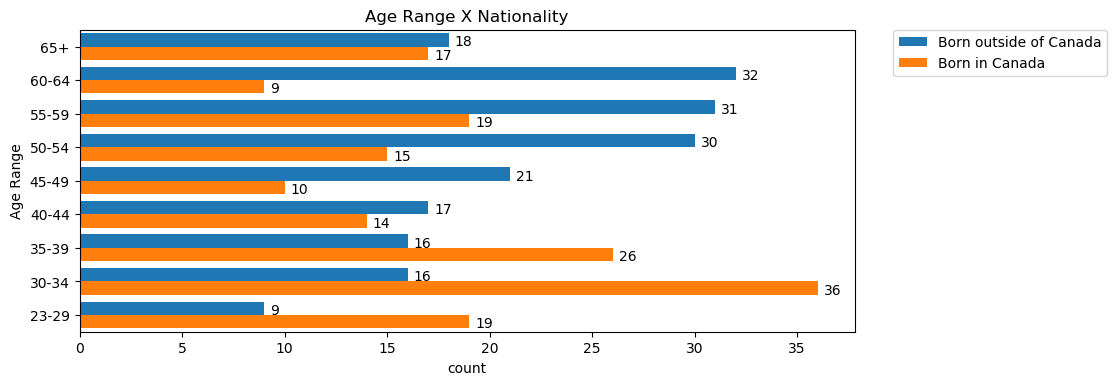

In [109]:
p = sns.countplot(data=data, y = 'Age Range', hue = 'Where were you born?', saturation=1, order=data.groupby('Age Range')['Age Range'].sum().sort_values(ascending=False).index)
plt.title('Age Range X Nationality')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_width pulls left or right; get_y pushes up or down
    p.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=10,color='black')

In [69]:
data['How long have you been looking for a new home?'].value_counts()

1-3 months           144
Over 6 months         84
Less than 4 weeks     82
4-6 months            50
Name: How long have you been looking for a new home?, dtype: int64

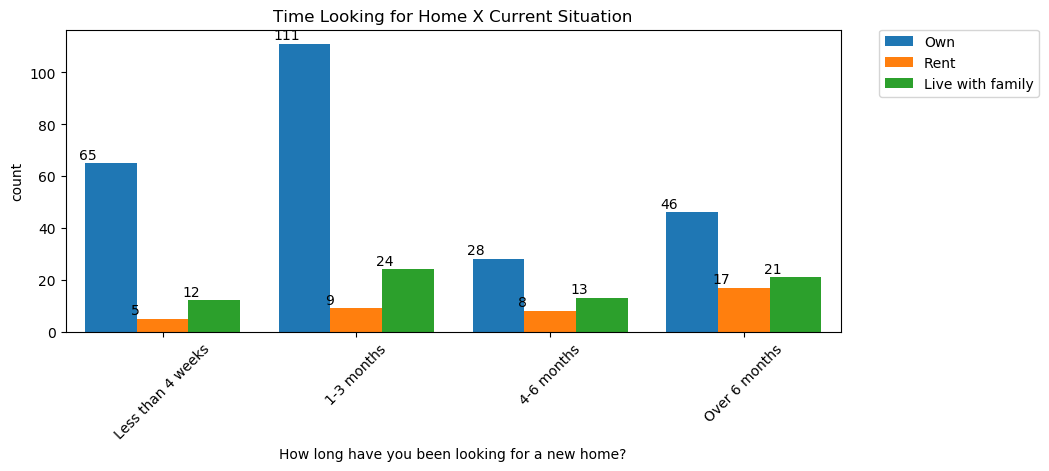

In [118]:
p = sns.countplot(data=data, x = 'How long have you been looking for a new home?', \
                  order=['Less than 4 weeks','1-3 months','4-6 months','Over 6 months'],\
                  hue = 'What is your current living situation?', saturation=1)
#                   order=data.groupby('How long have you been looking for a new home?')['How long have you been looking for a new home?'].sum().sort_values(ascending=False).index)
plt.title('Time Looking for Home X Current Situation')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in p.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in p.patches:
    # get_x pulls left or right; get_height pushes up or down
    p.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=10,verticalalignment='bottom', horizontalalignment='left', color='black')

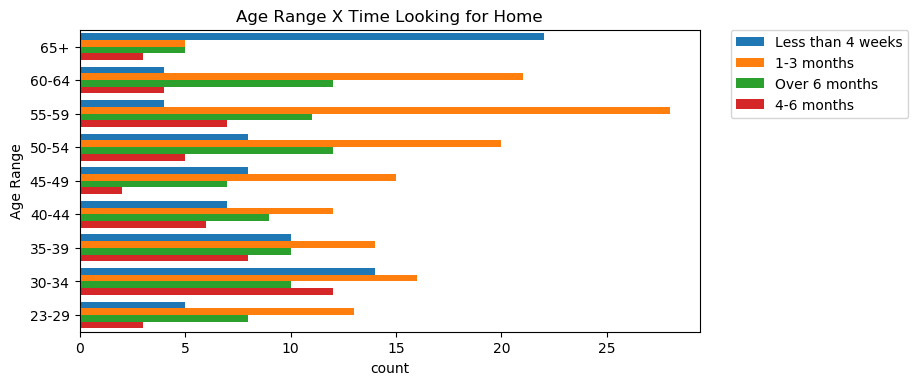

In [76]:
p = sns.countplot(data=data, y = 'Age Range', hue = 'How long have you been looking for a new home?', saturation=1, order=data.groupby('Age Range')['Age Range'].sum().sort_values(ascending=False).index)
plt.title('Age Range X Time Looking for Home')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\Luciana\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


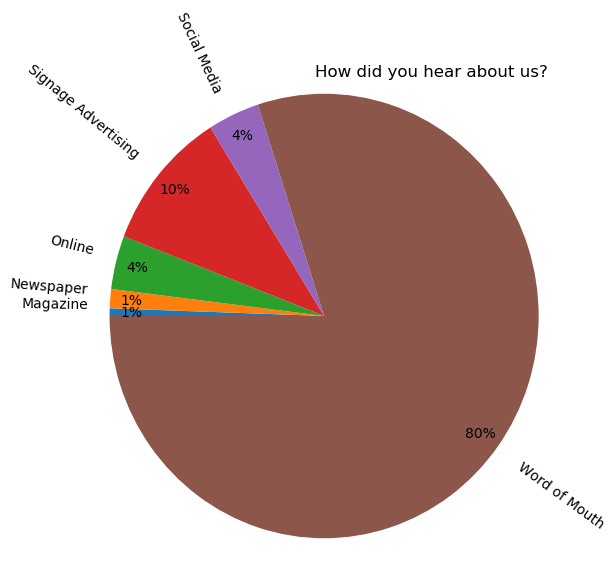

In [22]:
data.groupby('How did you hear about us?')['How did you hear about us?'].count().plot(kind='pie', figsize=(5,5),  
                            autopct='%1.0f%%', pctdistance=0.9, radius=1.2, textprops={'fontsize': 10}, rotatelabels = 270, startangle=180,counterclock=False)
# plt.rcParams['figure.dpi'] = 100;
plt.tight_layout()
plt.axes().set_ylabel('')
plt.title('How did you hear about us?', loc='right');


C:\Users\Luciana\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


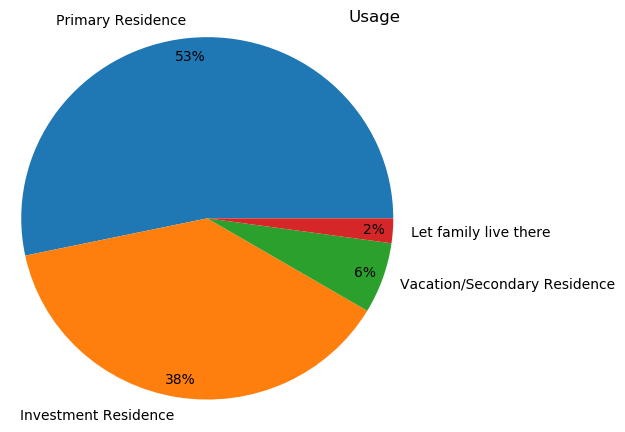

In [77]:
data['How do you intend to use your new home?'].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.9, radius=1.2, figsize=(5,5))
plt.title('Usage', loc='right');
plt.axes().set_ylabel('');

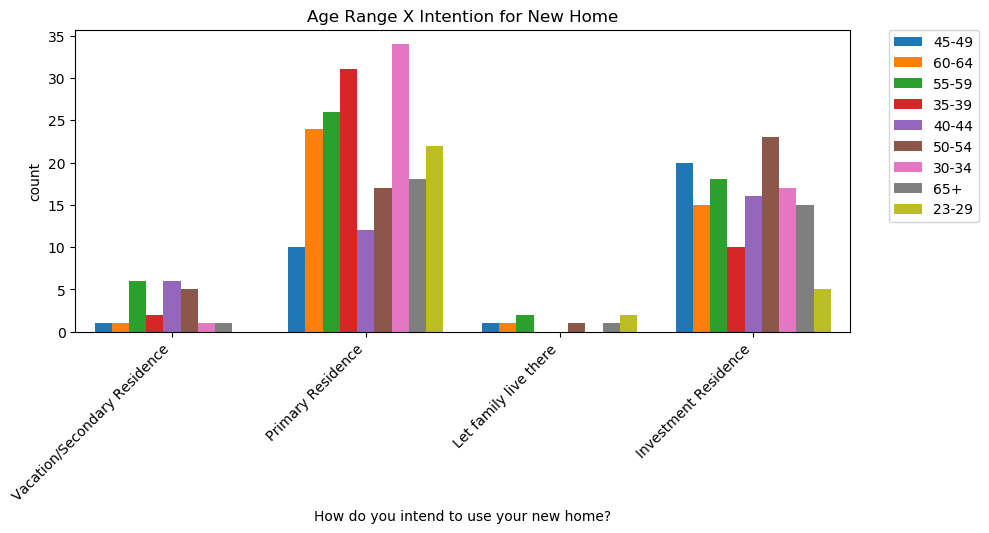

In [85]:
p = sns.countplot(data=data, x = 'How do you intend to use your new home?', \
                  hue = 'Age Range', saturation=1,\
              order=data.groupby('How do you intend to use your new home?')['How do you intend to use your new home?'].sum().sort_values(ascending=False).index)
plt.title('Age Range X Intention for New Home')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams["figure.figsize"] = (10,4)


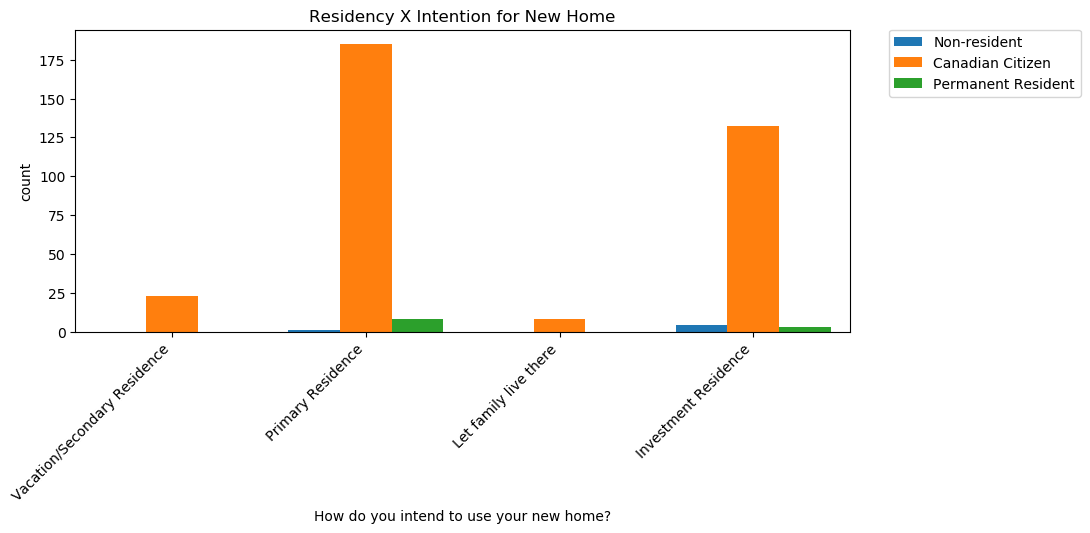

In [37]:
p = sns.countplot(data=data, x = 'How do you intend to use your new home?', hue = 'Residency', saturation=1, order=data.groupby('How do you intend to use your new home?')['How do you intend to use your new home?'].sum().sort_values(ascending=False).index)
plt.title('Residency X Intention for New Home')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams["figure.figsize"] = (8, 4)
